In [1]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# Generate Dataset
dataset = make_blobs(n_samples=200,
                    centers=4,
                    n_features=2,
                    cluster_std = 1.6,
                    random_state=50)

In [3]:
points = dataset[0]
points

array([[-1.06705283e+00,  9.24306355e+00],
       [ 1.08654318e+00, -6.94815805e+00],
       [-2.30970265e+00,  5.84969440e+00],
       [-1.59728965e+00,  8.45369045e+00],
       [-5.79816711e+00, -3.78405528e+00],
       [-2.29833776e+00, -4.66005371e+00],
       [-1.68210799e+00,  1.12843423e+01],
       [-7.38296450e-01, -5.20135260e+00],
       [-1.92048345e-01, -6.45318764e+00],
       [-6.37920287e+00, -2.17672355e+00],
       [-5.12054803e+00, -2.91449176e+00],
       [-4.22297649e+00,  9.04719945e+00],
       [-2.67815731e+00, -2.32828819e+00],
       [-3.02994109e+00,  1.86959382e+00],
       [-5.73938121e+00, -7.25648845e-01],
       [-1.99427571e+00,  4.28616868e+00],
       [-2.89522086e+00,  1.10222354e+01],
       [-1.11286937e+00,  1.03086380e+01],
       [-5.19987051e+00, -1.59879364e+00],
       [-4.75916597e+00, -1.97047767e+00],
       [-6.76865308e+00, -3.56907573e+00],
       [-2.65715781e+00,  3.33763714e+00],
       [-4.61722463e+00,  1.06373187e+01],
       [-1.

In [4]:
# import kmeans
from sklearn.cluster import KMeans

In [5]:
# create kmeans object
kmeans = KMeans(n_clusters=4)

In [6]:
#fix kmeans object to dataset
kmeans.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

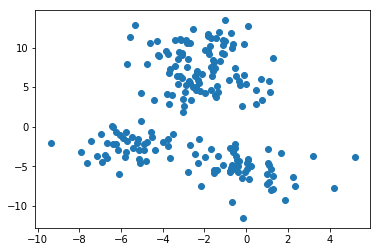

In [7]:
plt.scatter(dataset[0][:,0],dataset[0][:,1])

In [8]:
clusters = kmeans.cluster_centers_

In [9]:
#print out clusters
print(clusters)

[[ 0.05161133 -5.35489826]
 [-1.92101646  5.21673484]
 [-5.56465793 -2.34988939]
 [-2.40167949 10.17352695]]


In [10]:
y_km = kmeans.fit_predict(points)

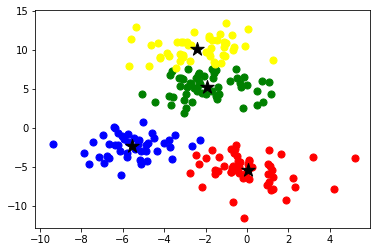

In [11]:
plt.scatter(points[y_km == 0,0],points[y_km == 0,1],s=50,color='red')
plt.scatter(points[y_km == 1,0],points[y_km == 1,1],s=50,color='green')
plt.scatter(points[y_km == 2,0],points[y_km == 2,1],s=50,color='blue')
plt.scatter(points[y_km == 3,0],points[y_km == 3,1],s=50,color='yellow')

plt.scatter(clusters[0][0],clusters[0][1],marker='*',s=200,color='black')
plt.scatter(clusters[1][0],clusters[1][1],marker='*',s=200,color='black')
plt.scatter(clusters[2][0],clusters[2][1],marker='*',s=200,color='black')
plt.scatter(clusters[3][0],clusters[3][1],marker='*',s=200,color='black')

plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [3]:
#This sample suppose the cluster center number is 3
#Centroid is (2, 2), (9, 2) and (4,9)
means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis = 0)

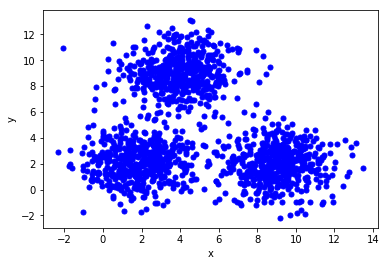

In [5]:
#Show generate dataset
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()

In [6]:
def kmeans_init_centers(X, n_cluster):
  # random k index beetween 0 and shape(X) without duplicate index.
  # Then return X[index] as cluster
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

In [7]:
def kmeans_visualize(X, centers, labels, n_cluster, title):
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(title)
  plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
 
  for i in range(n_cluster):
    data = X[labels == i]
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i))
    plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i))
  plt.legend()
  plt.show()

In [8]:
def kmeans_predict_labels(X, centers):
  D = cdist(X, centers)
  # return index of the closest center
  return np.argmin(D, axis = 1)

In [9]:
def kmeans_update_centers(X, labels, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    # collect all points assigned to the k-th cluster 
    Xk = X[labels == k, :]
    # take average
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

In [10]:
def kmeans_has_converged(centers, new_centers):
  # return True if two sets of centers are the same
  return (set([tuple(a) for a in centers]) == 
      set([tuple(a) for a in new_centers]))


In [11]:
def kmeans(init_centes, init_labels, X, n_cluster):
  centers = init_centes
  labels = init_labels
  times = 0
  while True:
    labels = kmeans_predict_labels(X, centers)
    kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))
    times += 1
  return (centers, labels, times)

[[ 4.37462768 11.1671811 ]
 [ 9.25246216  1.8398917 ]
 [ 9.03670041  2.11597351]]


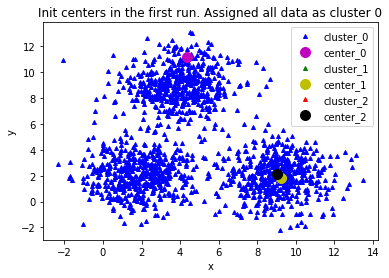

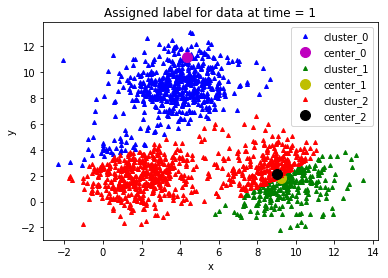

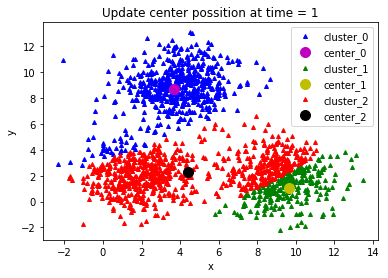

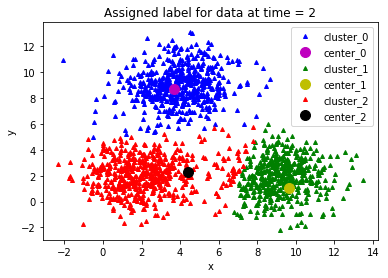

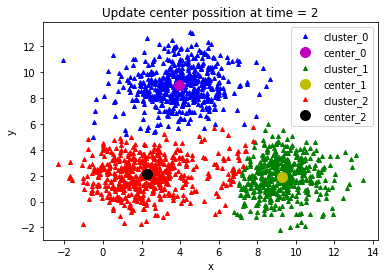

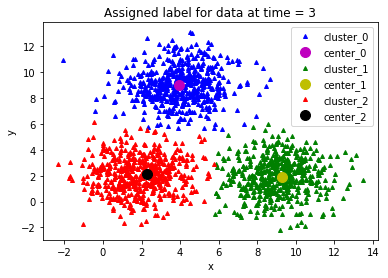

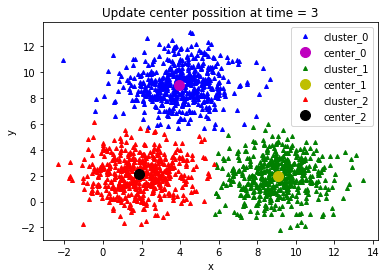

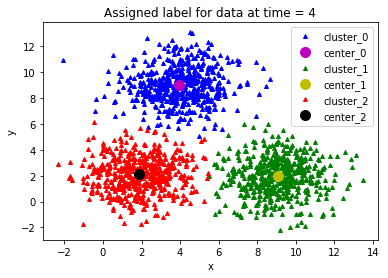

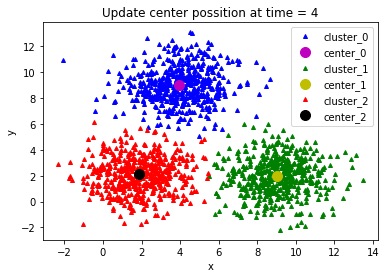

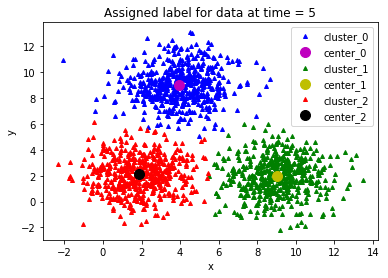

Done! Kmeans has converged after 4 times


In [12]:
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers)
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)

print('Done! Kmeans has converged after', times, 'times')

In [13]:
print(centers)

[[3.96164265 9.04324687]
 [9.03617226 1.97953043]
 [1.87201404 2.10031502]]
